# Movie Data Analysis

In this notebook, we will be exploring a movie data set and answer some questions based on our data.

![](https://images.unsplash.com/photo-1548095115-45697e222a58?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1476&q=80)Image by Aneta Pawlik from Unsplash.com

## About This Notebook

This `ipynb` is run on [Google Colab](https://colab.research.google.com/?utm_source=scs-index) as the IDE contains multiple built-in libraries such as `pandas` and many more. It also runs on LinuxOS, which allows more functions that a WinOS user cannot work with.

[Link to the Colab Notebook](https://colab.research.google.com/drive/1xT6a09wjuI7-w3eGkS2_NXr8cM8_iSnq?usp=sharing)

## About The Analysis

This analysis project is inspired by [Harshit Tyagi](https://dswharshit.medium.com/)'s blogpost at Towards Data Science: **2-Part Hitchiker's Guide To Exploratory Data Analysis.**

The blogs involved can be found here:

* [Part 01](https://towardsdatascience.com/hitchhikers-guide-to-exploratory-data-analysis-6e8d896d3f7e)
* [Part 02](https://towardsdatascience.com/hitchhikers-guide-to-exploratory-data-analysis-part-2-36ab72201e1d)

---

# Theory

Before we start analysing our movie data set, we will first start with some theories.

## What is EDA

**Exploratory data analysis (EDA)** is a crucial component of data science which allows you to develop the gist of what your data look like and what kinds of questions might be answered by them.

Ultimately, EDA is important because it allows the investigator to **make critical decisions** about what is interesting to pursue and what probably isn’t worth following up on and thus **building a hypothesis** using the relationships between variables.

## EDA Steps

To perform exploratory data analysis, we will typically follow the following steps:

1. Data Preview and Defining Questions
2. Data Cleaning
3. Data Transformation
4. Answering Questions

## Our Data Set

We will be using the Movie Dataset from Kaggle, which can be found [here](https://www.kaggle.com/tmdb/tmdb-movie-metadata/). It contains two files:

* `tmdb_5000_movies.csv` stores the details of the movies.
* `tmdb_5000_credits.csv` stores the credits of the making of the movies.

---

# Preanalyzing Steps

To start analyzing our movie data, we first need to set up our environment, import the suitable modules and import our data sets.

## Setting Up Environment

Typically, we will need to install some libraries or modules before importing them into our notebook.

```sh
pip install numpy pandas seaborn matplotlib
```

But since this notebook is written in Google Colab, the modules are preinstalled for us.

We will be cloning the GitHub repository that contains our movie data set. Link to the GitHub repository at [here](https://github.com/LimJY03/DataVisualization).

In [1]:
!git clone https://github.com/LimJY03/DataVisualization.git

Cloning into 'DataVisualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 3), reused 29 (delta 2), pack-reused 0
Unpacking objects: 100% (34/34), done.


## Importing Modules

For this notebook, we will need the following modules:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast, json

from datetime import datetime

# To Display Graph in Output
%matplotlib inline

More details on `%matplotlib inline` can be found in [the official documentation](https://ipython.readthedocs.io/en/stable/interactive/plotting.html#id11).

## Importing Movie Data Set

Now we will load our data set into data frames:

In [3]:
movies_df = pd.read_csv('./DataVisualization/Movie Data Analysis/data/movies.csv')
credits_df = pd.read_csv('./DataVisualization/Movie Data Analysis/data/credits.csv')

---

# Preview Data and Define Questions

In this first step, we will look at our data and propose some questions that may be answered with our data.

## Preview of Data Frames

We will start by previewing the first 5 rows of both data frames to get an idea of the contents inside each of them.

In [4]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


We can join both data frames together since they share the same ID so we will only be dealing with one data frame afterwards.

In [6]:
# Left join both data frames and give suffixes to duplicated columns in credits_df
movie_data = pd.merge(movies_df, credits_df, how='left', left_on='id', right_on='movie_id', suffixes=('', '_duplicate'))

Now we will look at the resulting data frame:

In [7]:
movie_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,title_duplicate,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Looks like we have several columns that cannot be shown, lets look at all columns available in our data frame:

In [8]:
movie_data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_duplicate', 'cast', 'crew'],
      dtype='object')

As we can see, the `production_countries`, `release_date`, `revenue` and `runtime` are not shown in the output preview. Lets take a look at the data of those columns:

In [9]:
movie_data[['production_countries', 'release_date', 'revenue', 'runtime']].head()

,production_countries,release_date,revenue,runtime
0,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0
1,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0
2,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0
3,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0
4,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0


## Defining Questions

After looking at the previews of all columns, we can start to propose some questions that can be answered with our data:

1. Top 5 Most Budget Expensive Movies
2. Top 5 Most Popular Movies
3. Top 5 Most Profitable Movies
4. Year of Most Profitable Movies
5. Budget Range of Profitable Movies
6. Average Runtime of Profitable Movies compared to Average Runtime of Movies 
7. Language of Profitable Movies
8. Most Successful Genres
9. Highly Voted Movies
10. Frequent Cast in the Movies

---

# Data Cleaning

After observing the dataset and proposed questions for the analysis, we will perform data cleaning to make our calculation easy and understandable. This is the first step in data processing.

Normally, data cleaning consists of the following steps:

1. Remove unused columns.
2. Removing the duplicate values in the rows (if any).
3. Removing invalid data (`NaN` etc.).



## Remove Unused and Duplicate Columns

Now that we have previewed all columns in our final data frame, we can see that there are many columns with descriptive data of the movies that aren't really useful. So, we will delete those columns:

In [10]:
# Creates A List Of Columns To Drop
columns_to_drop = ['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'status', 'tagline', 'title_duplicate']

# Drops The Columns
movie_data = movie_data.drop(columns_to_drop, axis=1)

# Preview New DataFrame
movie_data.head()

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Remove Duplicate Rows

As we cannot tell from the preview that there might be duplicate rows, we will run the following cell to "try and remove" the duplicate rows:

In [11]:
# Display Initial DataFrame Dimensions
print('Initial DataFrame Dimension:', movie_data.shape)

# Attempt to Drop Duplicate Rows
movie_data = movie_data.drop_duplicates(keep='first')

# Display Final DataFrame Dimensions
print('Final DataFrame Dimension:  ', movie_data.shape)

Initial DataFrame Dimension: (4803, 16)
Final DataFrame Dimension:   (4803, 16)


It is good that there are no duplicate rows in the original data frame, but it is still better to try and remove those duplicates just in case there are.

## Remove Invalid Data

Before we start converting data types and other data processing steps, we will first drop the invalid data.

Looking back at the [Data Set Description on Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv), we noticed that there are 0s in the `budget`, `revenue` and `runtime`. It is logically impossible to have a 0 budget, 0 revenue and 0 runtime, so this means that these 0s represent missing data in their columns.

So let's replace these 0s with `NaN` so that we can drop them easily next:

In [12]:
# Create a List of Columns to Replace 0 with NaN
replace0 = ['budget', 'revenue', 'runtime']

# Replace All 0 in The Columns with NaN
movie_data[replace0] = movie_data[replace0].replace(0, np.nan)

Now we will drop all rows containing `NaN`:

In [13]:
movie_data.dropna(axis=0, inplace=True)

# Display Final DataFrame Dimensions
print('New Final DataFrame Dimension:', movie_data.shape)

New Final DataFrame Dimension: (3229, 16)


As we can see, there are quite a few rows that contains `NaN` in the original data.

Now we have completed our data cleaning steps.

---

# Data Transformation

In this step, we will transform our data so that we can answer the questions that we defined earlier.

The most common data transformation steps are:

1. Change the data types of certain column.
2. Extract information from `JSON` strings.
3. Execute Mathematical operations on columns and place the result in new columns.

## Changing Data Type

First of all let's look at the data types of each columns in our data frame:

In [14]:
movie_data.dtypes

budget                  float64
genres                   object
id                        int64
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
title                    object
vote_average            float64
vote_count                int64
movie_id                  int64
cast                     object
crew                     object
dtype: object

Looks like some columns that are supposed to be `int64` are correct, we noticed that the `release_date` column can be parsed into a `datetime64` data type.

In [15]:
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'])

The reason that we normally would like to parse date data into `datetime64` format is because we can then split and extract the day, month and year out for further analysis (for example, to answer question 4).

## Extract Information from `JSON` Strings

Looking at the data preview before, we noticed certain columns containing `JSON` formatted strings, and it contains some unnecessary data that aren't really needed, so let's solve this problem.

We will first define a `JSON` parser function that only extracts the values that we want:

In [16]:
def parse(col, key):
    '''
    This function takes in 2 arguments:
    - col: Column of the DataFrame
    - key: Key of the JSON string to extract

    This function automatically extracts and replaces the value from the key into the DataFrame column.

    Return: None
    '''
    for index, json_string in zip(movie_data.index, movie_data[col].apply(json.loads)):
        extracted_value = [json_string[i][key] for i in range(len(json_string))]
        movie_data.loc[index, col] = str(extracted_value)

There are several columns that contains `JSON` strings and we only want to extract only certain values:

* `genres`: we only want the `name` of the genres.
* `production_companies`: we only want the `name` of the companies.
* `production_countries`: we only want the `name` of the countries.
* `spoken_languages`: we only want the `name` of the languages.
* `cast`: we only want the `name` of the cast.

Now we will use the function we defined earlier to do the data extraction:

In [17]:
parse('genres', 'name')
parse('production_companies', 'name')
parse('production_countries', 'name')
parse('spoken_languages', 'name')
parse('cast', 'name')

Note that the columns that contain data converted from `JSON` string is not a `list` but a `string`, so we will need to separate them into lists to answer some questions (for example genres, countries and languages).

Let's define a function to do that for us:

In [18]:
def str_to_list(columns):
    '''
    This function takes in 1 argument:
    - columns: List of column names to perform conversion
    
    This function converts The list-like strings into list.

    Returns: None
    '''
    for column in columns:
        movie_data[column] = movie_data[column].str.strip("[]").str.replace("'", '').str.split(', ')

Now we will convert the data of those columns into lists:

In [19]:
str_to_list(['genres', 'spoken_languages', 'production_countries', 'production_companies', 'cast'])

Let's look at what we have now before proceeding:

In [20]:
movie_data.head()

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,162.0,"[English, Español]",Avatar,7.2,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000.0,"[Adventure, Fantasy, Action]",285,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,9.610000e+08,169.0,[English],Pirates of the Caribbean: At World's End,6.9,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000.0,"[Action, Adventure, Crime]",206647,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,8.806746e+08,148.0,"[Français, English, Español, Italiano, Deutsch]",Spectre,6.3,4466,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000.0,"[Action, Crime, Drama, Thriller]",49026,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1.084939e+09,165.0,[English],The Dark Knight Rises,7.6,9106,49026,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000.0,"[Action, Adventure, Science Fiction]",49529,43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,2.841391e+08,132.0,[English],John Carter,6.1,2124,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


We successfully extracted the data that we want from the `JSON` strings into lists.

## Execute Operations and Create New Columns

In this step, we will mostly be referring to the questions that we want to answer.

There are some questions related to profit, which is generally the `revenue` minus `budget`, so we will be creating a column for `profit`:

In [21]:
movie_data['profit'] = movie_data['revenue'] - movie_data['budget']

Now, let's extract the year from `release_date` into a column called `release_year` so that we can easily answer questions related to years:

In [22]:
movie_data['release_year'] = movie_data['release_date'].dt.year

Finally, we will be arranging our column orders to make analyzing easier:

In [23]:
new_column_order = [
    'budget',
    'profit',
    'revenue',
    'title',
    'genres',
    'popularity',
    'release_date',
    'release_year',
    'runtime',
    'spoken_languages',
    'production_countries',
    'production_companies',
    'cast',
    'vote_average',
    'vote_count',
    'id'
]

Then applying it to modify the column order of our data frame:

In [24]:
movie_data = movie_data[new_column_order]

---

# Answering Questions

After processing and analyzing the data, we can finally start to answer some questions using the data we have.

## Question 01: Top 5 Most Budget Expensive Movies

To determine the top 5 most budget-expensive movies, we will sort our `movie_data` on the `budget` column, in descending order. Then, we will display the first 5 columns of the sorted data:

In [25]:
answer_to_q1 = movie_data.sort_values(by='budget', ascending=False).head()
answer_to_q1

,budget,profit,revenue,title,genres,popularity,release_date,release_year,runtime,spoken_languages,production_countries,production_companies,cast,vote_average,vote_count,id
17,380000000.0,6.657138e+08,1.045714e+09,Pirates of the Caribbean: On Stranger Tides,"[Adventure, Action, Fantasy]",135.413856,2011-05-14,2011,136.0,"[English, Español]",[United States of America],"[Walt Disney Pictures, Jerry Bruckheimer Films...","[Johnny Depp, Penélope Cruz, Ian McShane, Kevi...",6.4,4948,1865
1,300000000.0,6.610000e+08,9.610000e+08,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",139.082615,2007-05-19,2007,169.0,[English],[United States of America],"[Walt Disney Pictures, Jerry Bruckheimer Films...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",6.9,4500,285
7,280000000.0,1.125404e+09,1.405404e+09,Avengers: Age of Ultron,"[Action, Adventure, Science Fiction]",134.279229,2015-04-22,2015,141.0,[English],[United States of America],"[Marvel Studios, Prime Focus, Revolution Sun S...","[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",7.3,6767,99861
10,270000000.0,1.210812e+08,3.910812e+08,Superman Returns,"[Adventure, Fantasy, Action, Science Fiction]",57.925623,2006-06-28,2006,154.0,"[English, Français, Deutsch]",[United States of America],"[DC Comics, Legendary Pictures, Warner Bros., ...","[Brandon Routh, Kevin Spacey, Kate Bosworth, J...",5.4,1400,1452
4,260000000.0,2.413910e+07,2.841391e+08,John Carter,"[Action, Adventure, Science Fiction]",43.926995,2012-03-07,2012,132.0,[English],[United States of America],[Walt Disney Pictures],"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",6.1,2124,49529


Looks like the top 5 most budget-expensive movies are:

1. `[2011]` Pirates of the Caribbean: On Stranger Tides
2. `[2007]` Pirates of the Caribbean: At World's End
3. `[2015]` Avengers: Age of Ultron
4. `[2006]` Superman Returns
5. `[2012]` John Carter

## Question 02: Top 5 Most Popular Movies

Similar to answering the question above, now we will arrange the data frame on the `popularity` columns instead:

In [26]:
answer_to_q2 = movie_data.sort_values(by='popularity', ascending=False).head()
answer_to_q2

,budget,profit,revenue,title,genres,popularity,release_date,release_year,runtime,spoken_languages,production_countries,production_companies,cast,vote_average,vote_count,id
546,74000000.0,1.082731e+09,1.156731e+09,Minions,"[Family, Animation, Adventure, Comedy]",875.581305,2015-06-17,2015,91.0,[English],[United States of America],"[Universal Pictures, Illumination Entertainment]","[Sandra Bullock, Jon Hamm, Michael Keaton, All...",6.4,4571,211672
95,165000000.0,5.101200e+08,6.751200e+08,Interstellar,"[Adventure, Drama, Science Fiction]",724.247784,2014-11-05,2014,169.0,[English],"[Canada, United States of America, United King...","[Paramount Pictures, Legendary Pictures, Warne...","[Matthew McConaughey, Jessica Chastain, Anne H...",8.1,10867,157336
788,58000000.0,7.251130e+08,7.831130e+08,Deadpool,"[Action, Adventure, Comedy]",514.569956,2016-02-09,2016,108.0,[English],[United States of America],"[Twentieth Century Fox Film Corporation, Marve...","[Ryan Reynolds, Morena Baccarin, Ed Skrein, T....",7.4,10995,293660
94,170000000.0,6.033286e+08,7.733286e+08,Guardians of the Galaxy,"[Action, Science Fiction, Adventure]",481.098624,2014-07-30,2014,121.0,[English],"[United Kingdom, United States of America]","[Marvel Studios, Moving Picture Company (MPC),...","[Chris Pratt, Zoe Saldana, Dave Bautista, Vin ...",7.9,9742,118340
127,150000000.0,2.288583e+08,3.788583e+08,Mad Max: Fury Road,"[Action, Adventure, Science Fiction, Thriller]",434.278564,2015-05-13,2015,120.0,[English],"[Australia, United States of America]","[Village Roadshow Pictures, Kennedy Miller Pro...","[Tom Hardy, Charlize Theron, Nicholas Hoult, H...",7.2,9427,76341


As we can see from the output above, the top 5 most popular movies are:

1. `[2015]` Minions
2. `[2014]` Interstellar
3. `[2016]` Deadpool
4. `[2014]` Guardians of the Galaxy
5. `[2015]` Mad Max: Fury Road

## Question 03: Top 5 Most Profitable Movies

Similar again to the above questions, we will now sort by the `profit` columns:

In [27]:
answer_to_q3 = movie_data.sort_values(by='profit', ascending=False).head()
answer_to_q3

,budget,profit,revenue,title,genres,popularity,release_date,release_year,runtime,spoken_languages,production_countries,production_companies,cast,vote_average,vote_count,id
0,237000000.0,2.550965e+09,2.787965e+09,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,2009-12-10,2009,162.0,"[English, Español]","[United States of America, United Kingdom]","[Ingenious Film Partners, Twentieth Century Fo...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",7.2,11800,19995
25,200000000.0,1.645034e+09,1.845034e+09,Titanic,"[Drama, Romance, Thriller]",100.025899,1997-11-18,1997,194.0,"[English, Français, Deutsch, svenska, Italiano...",[United States of America],"[Paramount Pictures, Twentieth Century Fox Fil...","[Kate Winslet, Leonardo DiCaprio, Frances Fish...",7.5,7562,597
28,150000000.0,1.363529e+09,1.513529e+09,Jurassic World,"[Action, Adventure, Science Fiction, Thriller]",418.708552,2015-06-09,2015,124.0,[English],[United States of America],"[Universal Studios, Amblin Entertainment, Lege...","[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",6.5,8662,135397
44,190000000.0,1.316249e+09,1.506249e+09,Furious 7,[Action],102.322217,2015-04-01,2015,137.0,[English],"[Japan, United States of America]","[Universal Pictures, Original Film, Fuji Telev...","[Vin Diesel, Paul Walker, Dwayne Johnson, Mich...",7.3,4176,168259
16,220000000.0,1.299558e+09,1.519558e+09,The Avengers,"[Science Fiction, Action, Adventure]",144.448633,2012-04-25,2012,143.0,[English],[United States of America],"[Paramount Pictures, Marvel Studios]","[Robert Downey Jr., Chris Evans, Mark Ruffalo,...",7.4,11776,24428


Looks like the top 5 most profitable movies are:

1. `[2009]` Avatar
2. `[1997]` Titanic
3. `[2015]` Jurassic World
4. `[2015]` Furious 7
5. `[2012]` The Avengers

## Question 04: Year of Most Profitable Movies

From the output above, we can see that in 2015, there are 2 highly profitable movies.

Let's see the range of `release_year` for profitable movies.

We will use the Top 25% of Most Profitable Movies (Q3 or 0.75 quantile):

In [28]:
top25_profit = movie_data['profit'].quantile(q=0.75)
top25_profit

97489822.0

We will be using \$97,500,000 as our minimum for a movie to be considered "profitable".

Now let's plot a graph to see the range of year of profitable movies:

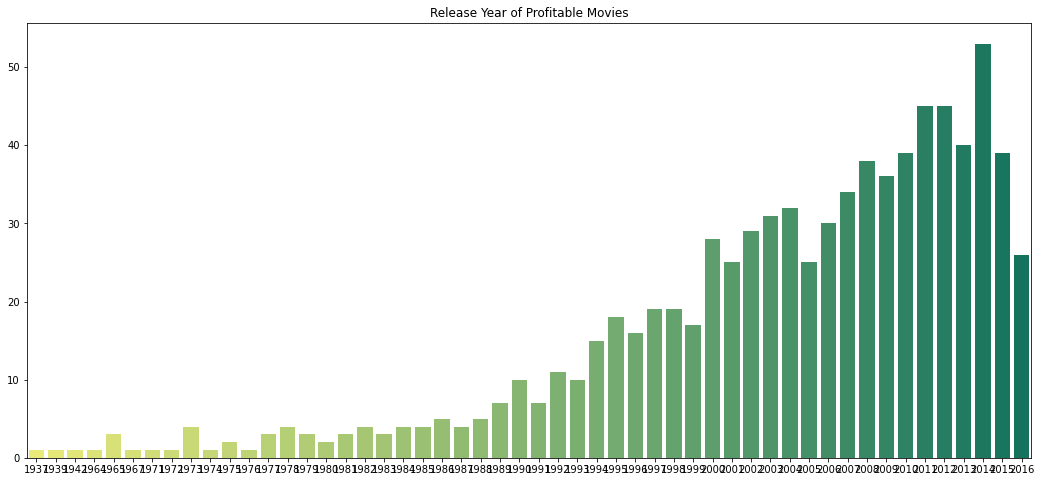

In [29]:
profitable_movies = movie_data.query('profit > 97500000')

# Count The Frequency of Each Year of Release
series_of_q4 = profitable_movies['release_year'].value_counts()

# Set The Graph Configuration
plt.figure(figsize=(18, 8))
plt.title('Release Year of Profitable Movies')

# Plot The Graph
sns.barplot(x=series_of_q4.keys(), y=series_of_q4.values, palette='summer_r')

We can see that there are many profitable movies produced on 2010 to 2014. These years are the top 5 most number of profitable movies produced.

Let's explore further to understand why it is so. Now we will plot line graphs of number of movies produced for all years compared to that of profitable movies:

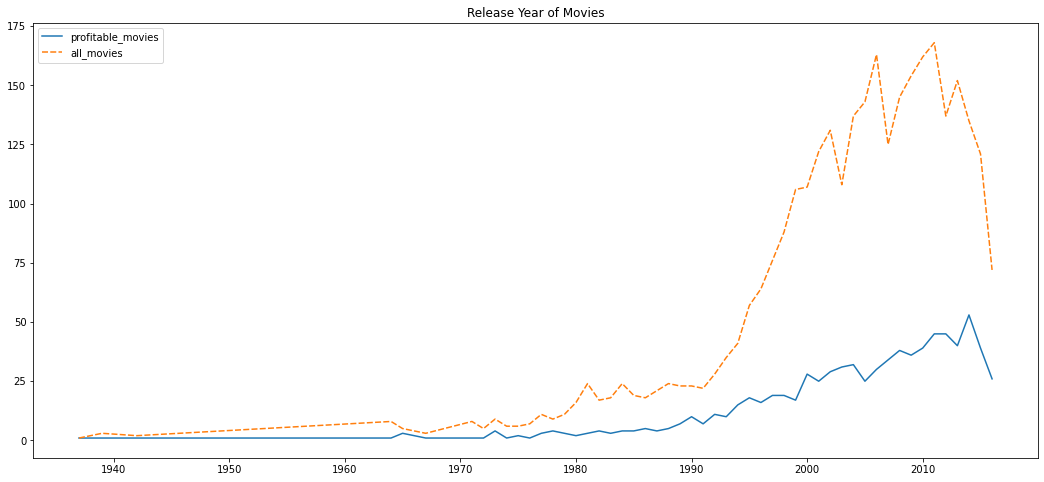

In [30]:
# Declare A Data Frame
df_of_q4 = pd.DataFrame()

# Create New Data Frame
df_of_q4['profitable_movies'] = series_of_q4
df_of_q4['all_movies'] = movie_data['release_year'].value_counts()

# Set The Graph Configuration
plt.figure(figsize=(18, 8))
plt.title('Release Year of Movies')

# Plot The Graph
sns.lineplot(data=df_of_q4)

We can see that the number of movies produced also spikes up from around the year 1995 to 2015, therefore we cannot safely say that the profitable movies should be produced on 2010 to 2014.

Let's try to find the percentage of profitable movies per year:

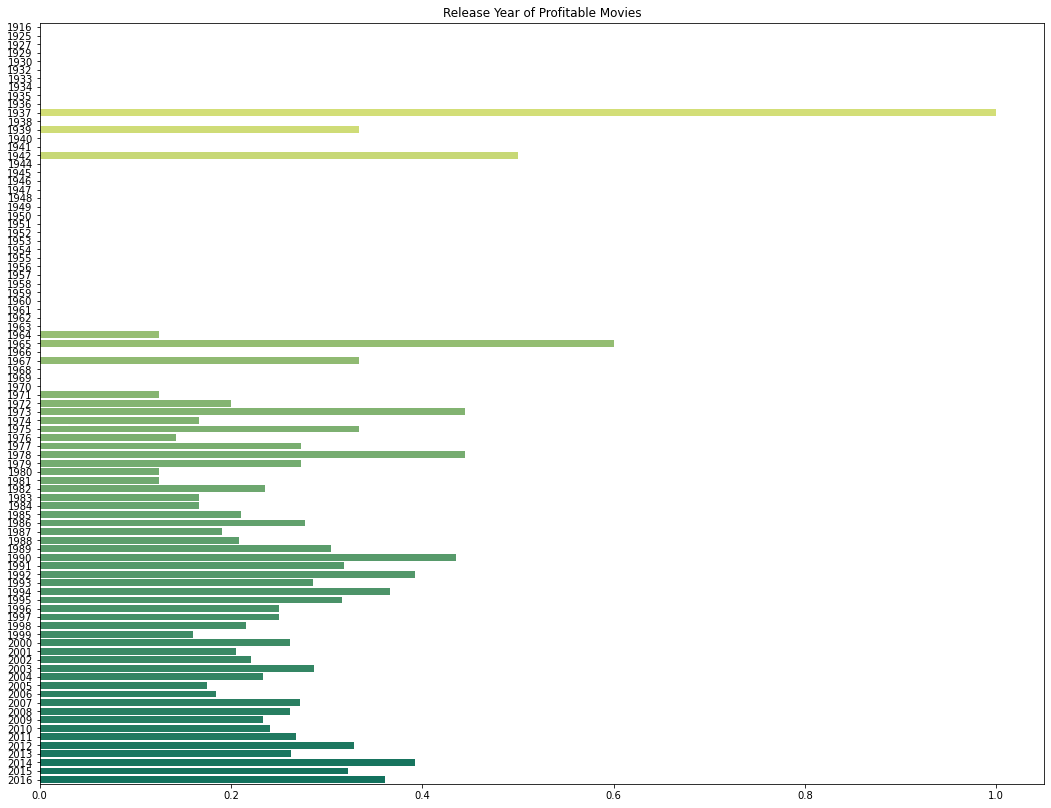

In [31]:
series2_of_q4 = profitable_movies['release_year'].value_counts()
series2_of_q4 = series2_of_q4.div(movie_data['release_year'].value_counts())

# Set The Graph Configuration
plt.figure(figsize=(18, 14))
plt.title('Release Year of Profitable Movies')

# Plot The Graph
sns.barplot(x=series2_of_q4.values, y=series2_of_q4.keys(), orient='h', palette='summer_r')

Just as we expected, the percentage of profitable movies produced generally decreases as year increases, this is because the number of less profitable movies produced increases as year increases.

## Question 05: Budget Range of Profitable Movies

For this question, we will plot the graph of `profit` against `budget` to see their relationship:

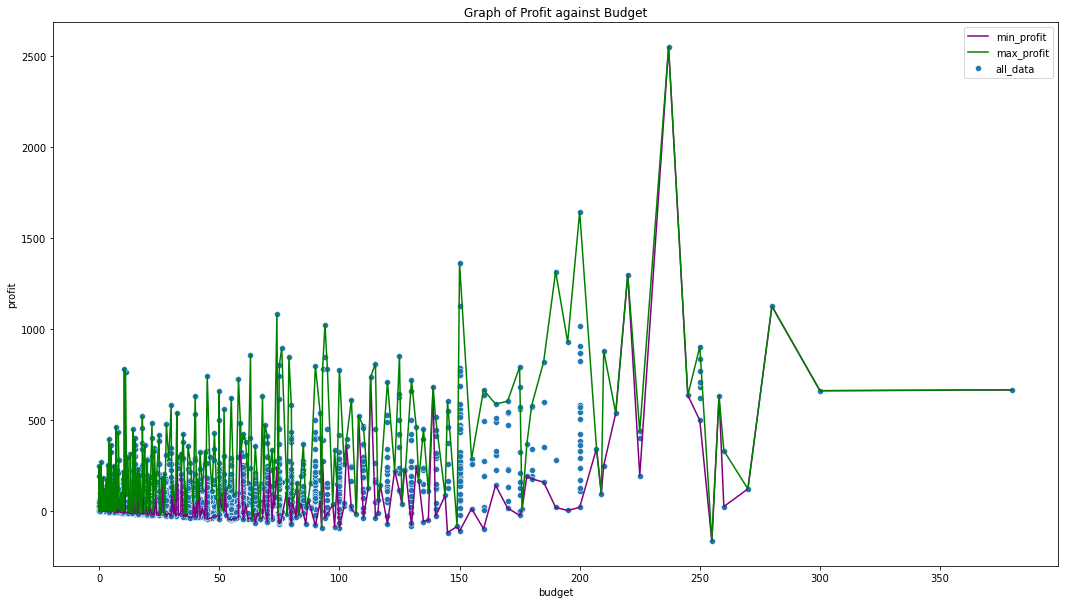

In [32]:
# Extract Data (in Millions) That We Need Only
df_of_q5 = movie_data[['budget', 'profit']].div(1000000)

# Set The Graph Configuration
plt.figure(figsize=(18, 10))
plt.title('Graph of Profit against Budget')

# Get Max and Min of Profit for Similar Runtime
budget_min_profit = df_of_q5.groupby('budget').min()
budget_max_profit = df_of_q5.groupby('budget').max()

# Plot The Graph
sns.lineplot(data=budget_min_profit, x='budget', y='profit', color='purple')
sns.lineplot(data=budget_max_profit, x='budget', y='profit', color='green')
sns.scatterplot(data=df_of_q5, x='budget', y='profit')

# Create Legend
plt.legend(['min_profit', 'max_profit', 'all_data'])

We can see that the highly profitable movies generally have higher budgets.

The graph shows that by investing more money into the budget, movies tend to get higher profit in return. However, we can also see that the higher the budget, the higher the risk of getting a loss or much lower profit in return.

The frequency of the spikes in the graph also shows that more movies have generally lower budgets.

So to answer the question, the budget range of most profitable movies is **between \$200 Million to \$300 Million**.

Let's also take a look at the average revenue of profitable movies:

In [33]:
profitable_movies['revenue'].quantile(q=0.5)

261445332.5

We can say that for a movie that generates around $260 Million of revenue have a high chance to be profitable.

## Question 06: Average Runtime of Profitable Movies compared to Average Runtime of Movies

Lets do the normal statistics and compare the average runtime of profitable movies to that of all movies:

In [34]:
# Display Average Runtime of Profitable Movies
print('Profitable:', profitable_movies['runtime'].mean())

# Display Average Runtime of Movies
print('All Movies:', movie_data['runtime'].mean())

Profitable: 116.12903225806451
All Movies: 110.72437287085785


Looks like they are quite near, maybe there are many movies that are profitable. Lets visualize it with a graph instead:

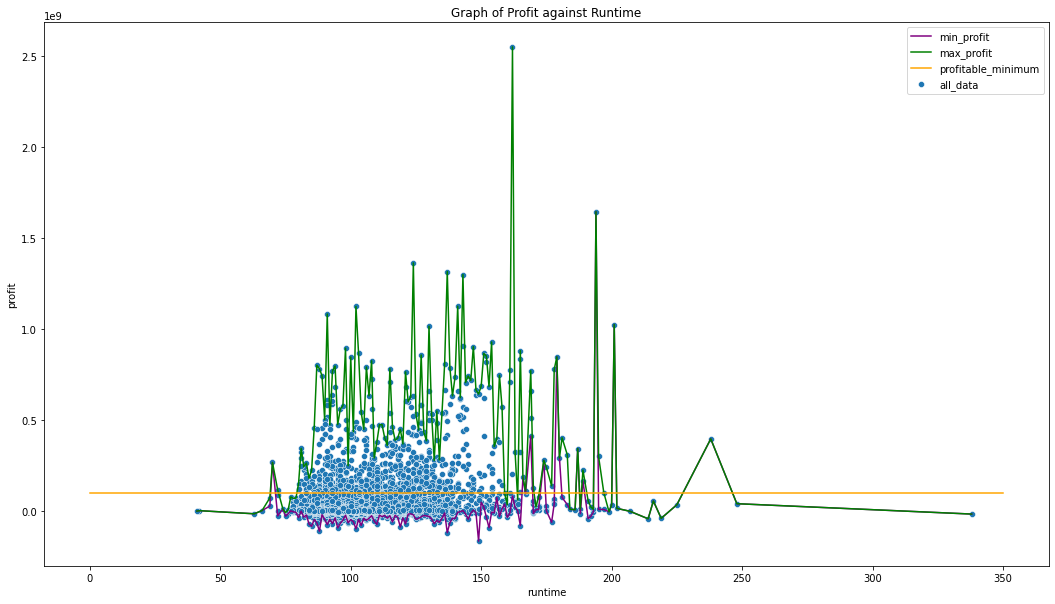

In [35]:
df_of_q6 = movie_data[['runtime', 'profit']]

# Set The Graph Configuration
plt.figure(figsize=(18, 10))
plt.title('Graph of Profit against Runtime')

# Get Max and Min of Profit for Similar Runtime
runtime_min_profit = movie_data[['runtime', 'profit']].groupby('runtime').min()
runtime_max_profit = movie_data[['runtime', 'profit']].groupby('runtime').max()

# Plot The Graph
sns.lineplot(data=runtime_min_profit, x='runtime', y='profit', color='purple')
sns.lineplot(data=runtime_max_profit, x='runtime', y='profit', color='green')
sns.lineplot(x=[0, 350], y=97500000, color='orange')
sns.scatterplot(data=df_of_q6, x='runtime', y='profit')

# Create Legend
plt.legend(['min_profit', 'max_profit', 'profitable_minimum', 'all_data'])

We can see that movies with around 75 to 140 minutes of runtime have an average profit of between \$0 to \$25 Million.

We also noticed that movies that are highly profitable and less likely to have a loss have a runtime of between 150 and 200 minutes.

## Question 07: Language of Profitable Movies

For this question, we will plot a bar chart for each language available for all profitable movies. We will then display the bar chart to show which languages are the most common among profitable movies:


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26222 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36890 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35805 missing from current font.
  font.set_

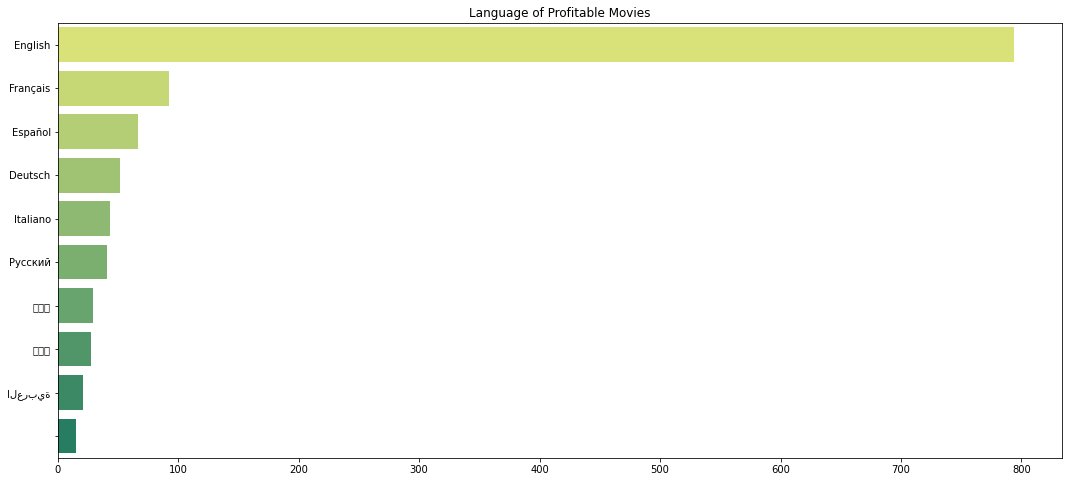

In [36]:
all_languages = []
for language in profitable_movies['spoken_languages']: 
    all_languages.extend(language)

# Count Each Languages and Store The Top 10 Most Common Languages
series_of_q7 = pd.Series(all_languages).value_counts()[:10].sort_values(ascending=False)

# Set The Graph Configuration
plt.figure(figsize=(18, 8))
plt.title('Language of Profitable Movies')

# Plot The Graph
sns.barplot(x=series_of_q7.values, y=series_of_q7.keys(), palette='summer_r')

As we can see from the bar chart, English is the most common language among all profitable movies. The other common languages are French, Spanish, German and Italian.

## Question 08: Most Successful Genres

Similar to the question above, we will also be using a bar chart to display the genres that are frequently occurred on profitable movies:

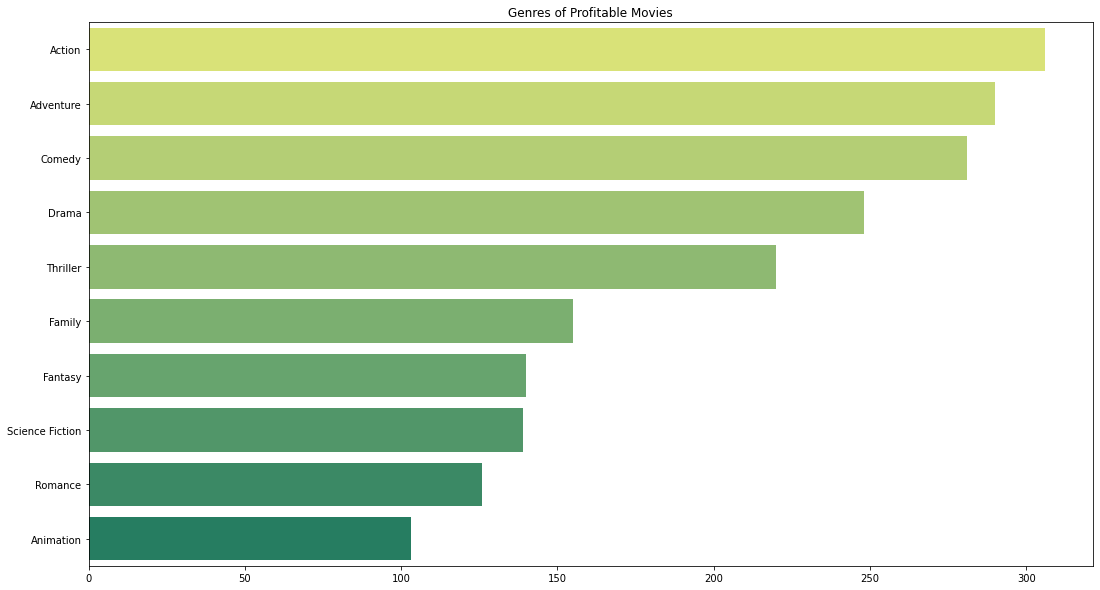

In [37]:
all_genres = []
for genres in profitable_movies['genres']:
    all_genres.extend(genres)

# Count Each Languages and Store The Top 10 Most Common Languages
series_of_q8 = pd.Series(all_genres).value_counts()[:10].sort_values(ascending=False)

# Set The Graph Configuration
plt.figure(figsize=(18, 10))
plt.title('Genres of Profitable Movies')

# Plot The Graph
sns.barplot(x=series_of_q8.values, y=series_of_q8.keys(), palette='summer_r')

We can see that the top 5 most common genres of profitable movies are:

1. Action
2. Adventure
3. Comedy
4. Drama
5. Thriller

These 5 genres are highly common compared to the family, fantasy, science fiction, romance and animation genres.

Therefore, we can safely say that there are more audience that have higher interest towards action, adventure, comedy, drama and thriller genres.

## Question 09: Highly Voted Movies

To determine the highly voted movies, we will sort our `movie_data` on the `vote_average` column, in descending order. Then, we will display the first 5 columns of the sorted data:

In [38]:
answer_to_q9 = movie_data.sort_values(by='vote_average', ascending=False).head()
answer_to_q9

,budget,profit,revenue,title,genres,popularity,release_date,release_year,runtime,spoken_languages,production_countries,production_companies,cast,vote_average,vote_count,id
1881,25000000.0,3341469.0,28341469.0,The Shawshank Redemption,"[Drama, Crime]",136.747729,1994-09-23,1994,142.0,[English],[United States of America],[Castle Rock Entertainment],"[Tim Robbins, Morgan Freeman, Bob Gunton, Clan...",8.5,8205,278
2970,10500000.0,-10376491.0,123509.0,There Goes My Baby,"[Drama, Comedy]",0.037073,1994-09-02,1994,99.0,[English],[United States of America],[Nelson Entertainment],"[Dermot Mulroney, Ricky Schroder, Kelli Willia...",8.5,2,88641
3337,6000000.0,239066411.0,245066411.0,The Godfather,"[Drama, Crime]",143.659698,1972-03-14,1972,175.0,"[English, Italiano, Latin]",[United States of America],"[Paramount Pictures, Alfran Productions]","[Marlon Brando, Al Pacino, James Caan, Richard...",8.4,5893,238
3865,3300000.0,9792000.0,13092000.0,Whiplash,[Drama],192.528841,2014-10-10,2014,105.0,[English],[United States of America],"[Bold Films, Blumhouse Productions, Right of W...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...",8.3,4254,244786
2731,13000000.0,34542841.0,47542841.0,The Godfather: Part II,"[Drama, Crime]",105.792936,1974-12-20,1974,200.0,"[English, Italiano, Latin, Español]",[United States of America],"[Paramount Pictures, The Coppola Company]","[Al Pacino, Robert Duvall, Diane Keaton, Rober...",8.3,3338,240


Immediately we can see that there can be a potential problem: the `vote_count` being too low which may cause certain bias.

Let's find the top 25% of `vote_count`:

In [39]:
top25_vote = movie_data['vote_count'].quantile(q=0.75)
top25_vote

1148.0

So now lets compare the top rated movies with `vote_count` of at least 1148:

In [40]:
more_voted_movies = movie_data.query('vote_count >= 1148')

answer_to_q9 = more_voted_movies.sort_values(by='vote_average', ascending=False).head()
answer_to_q9

,budget,profit,revenue,title,genres,popularity,release_date,release_year,runtime,spoken_languages,production_countries,production_companies,cast,vote_average,vote_count,id
1881,25000000.0,3341469.0,28341469.0,The Shawshank Redemption,"[Drama, Crime]",136.747729,1994-09-23,1994,142.0,[English],[United States of America],[Castle Rock Entertainment],"[Tim Robbins, Morgan Freeman, Bob Gunton, Clan...",8.5,8205,278
3337,6000000.0,239066411.0,245066411.0,The Godfather,"[Drama, Crime]",143.659698,1972-03-14,1972,175.0,"[English, Italiano, Latin]",[United States of America],"[Paramount Pictures, Alfran Productions]","[Marlon Brando, Al Pacino, James Caan, Richard...",8.4,5893,238
2731,13000000.0,34542841.0,47542841.0,The Godfather: Part II,"[Drama, Crime]",105.792936,1974-12-20,1974,200.0,"[English, Italiano, Latin, Español]",[United States of America],"[Paramount Pictures, The Coppola Company]","[Al Pacino, Robert Duvall, Diane Keaton, Rober...",8.3,3338,240
3232,8000000.0,205928762.0,213928762.0,Pulp Fiction,"[Thriller, Crime]",121.463076,1994-10-08,1994,154.0,"[English, Español, Français]",[United States of America],"[Miramax Films, A Band Apart, Jersey Films]","[John Travolta, Samuel L. Jackson, Uma Thurman...",8.3,8428,680
1818,22000000.0,299365567.0,321365567.0,Schindler's List,"[Drama, History, War]",104.469351,1993-11-29,1993,195.0,"[Deutsch, Polski, עִבְרִית, English]",[United States of America],"[Universal Pictures, Amblin Entertainment]","[Liam Neeson, Ben Kingsley, Ralph Fiennes, Car...",8.3,4329,424


As we can see from the output cell above, the top 5 movies that are highly rated are:

1. `[1994]` The Shwshank Redemption
2. `[1972]` The Godfather
3. `[1974]` The Godfather: Part II
4. `[1994]` Pulp Fiction
5. `[1993]` Schindler's List

## Question 10: Frequent Cast in the Movies

For this question, we will again plot a bar chart for each cast for all profitable movies. We will then display the bar chart to show which cast are the are present most frequently among profitable movies:

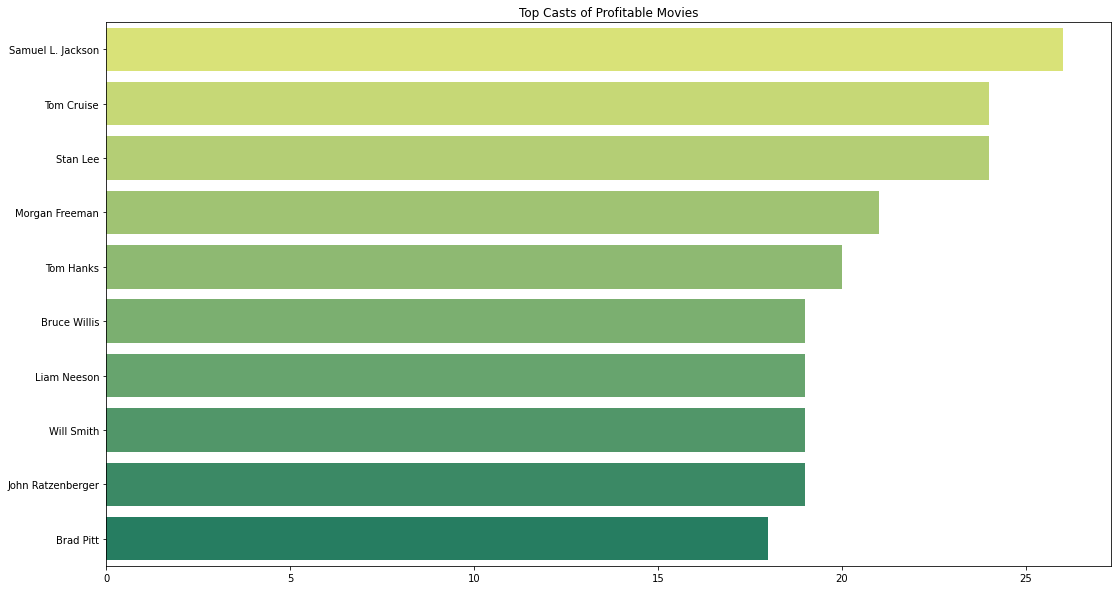

In [41]:
all_cast = []
for cast in profitable_movies['cast']:
    all_cast.extend(cast)

# Count Each Cast and Store The Top 10 Most Frequently Occurred Cast
series_of_q10 = pd.Series(all_cast).value_counts()[:10].sort_values(ascending=False)

# Set The Graph Configuration
plt.figure(figsize=(18, 10))
plt.title('Top Casts of Profitable Movies')

# Plot The Graph
sns.barplot(x=series_of_q10.values, y=series_of_q10.keys(), palette='summer_r')

Looks like our top 5 casts in all profitable movies are:

1. Samuel L. Jackson
2. Tom Cruise
3. Stan Lee
4. Morgan Freeman
5. Tom Hanks

---

# Conclusion

Now that we have completed answering all questions we defined earlier, it's time to conclude the insights that we have analyzed.

## Notebook Recap

In this notebook, we started with the theory of Exploratory Data Analysis (EDA). Then, we have walked through steps in performing EDA:

We started our code by importing modules that will be used in our EDA. Then we continued to preview our data and defining questions, perform data cleaning and data transformation, and finally to answer the questions we defined earlier using the data we have via data visualization.

## Analysis Conclusion

From the questions that we have answered above, we can conclude that for a movie to be profitable, it is encouraged that:

* Invest in budget, but not too much to avoid loss.
* Try to generate a revenue of around $260 Million.
* Have a runtime of around 150 to 200 minutes.
* Must support the following languages:
    * English
    * French
    * Spanish
    * German
    * Italian language
* Must have one of the following genres:
    * Action
    * Adventure
    * Comedy
    * Drama
    * Thriller
* Have any of the following cast in production: 
    * Samuel L. Jackson 
    * Tom Cruise
    * Stan Lee
    * Morgan Freeman
    * Tom Hanks
